# ML-Based Fake Job Postings Detector Using NLP and Machine Learning

## 1.IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.DATA LOADING

In [2]:
df = pd.read_csv(r"C:\Users\user\Videos\fake\fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## 3.UNDERSTANDING THE DATASET

In [3]:
df.shape

(17880, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [7]:
df['fraudulent'].value_counts(normalize=True) * 100

fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64

In [8]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
df.sample(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
14165,14166,English Teacher Abroad,"US, CO, Escondido",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,0


## 4.DATA PREPROCESSING

### 4.1.DROP COLUMNS

In [10]:
df.drop(['job_id', 'telecommuting', 'has_company_logo', 'has_questions','salary_range'], axis=1, inplace=True)

In [11]:
df.shape

(17880, 13)

In [12]:
df.sample(5)

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
14513,Product Manager Cloud Product (m/w),"DE, BY, Munich",tech,hello worldtalents23_ drives the change in dig...,We are a fast-growing venture-capital financed...,2 years + of hands-on product management exper...,Launch product featuresBreak down product visi...,Full-time,Associate,NaN,Hospitality,Product Management,0
16468,Licensed Massage Therapist/Integrated Practice...,"US, TX, Cleburne",NaN,NaN,"Exciting opportunity to join a fun, fast-growi...","In addition to great hands, you must -be licen...",Contact position: $24-$30/hr DOEFlexible Schedule,Contract,NaN,High School or equivalent,"Health, Wellness and Fitness",Health Care Provider,0
13153,NL Homecare Community Carers (HCC),"GB, , See the Requirements section for areas a...",Healthcare (Community),NL Group supplies specialist healthcare recrui...,Various locations within Hull and the East Rid...,As a Home Care Professional Carer your duties ...,We like to think that our greatest benefit is ...,NaN,NaN,NaN,NaN,NaN,0
17516,iOS Developer - Official London Travel App,"GB, LND, London",Software Development,What Now?! is an innovative new app that simul...,ABOUTWhat Now?! is an innovative new app that ...,MINIMUM QUALIFICATIONS User interface developm...,Job type: Full-timeCompensation: Generous and ...,Full-time,Not Applicable,Unspecified,"Leisure, Travel & Tourism",Engineering,0
2440,Interaction/Graphic Designer,"NL, NH, Amsterdam",IT,About the CompanyWe are ticketscript - the Eur...,About the CompanyWe are ticketscript - the Eur...,"Your profileTo be successful, he or she must b...",Our offerA competitive salary within an intern...,Full-time,Associate,NaN,Internet,Information Technology,0


### 4.2.FILL MISSING VALUES 

In [13]:
retain_columns = ['title','location','department','company_profile','description','requirements','benefits']
df[retain_columns] = df[retain_columns].fillna('')

In [14]:
df[retain_columns]

,title,location,department,company_profile,description,requirements,benefits
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered
...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,
17878,Graphic Designer,"NG, LA, Lagos",,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...


In [15]:
df['text'] = df['title'] + ' ' + df['department']+ ' ' +df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

In [16]:
df['text']

0        Marketing Intern Marketing We're Food52, and w...
1        Customer Service - Cloud Video Production Succ...
2        Commissioning Machinery Assistant (CMA)  Valor...
3        Account Executive - Washington DC Sales Our pa...
4        Bill Review Manager  SpotSource Solutions LLC ...
                               ...                        
17875    Account Director - Distribution  Sales Vend is...
17876    Payroll Accountant Accounting WebLinc is the e...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer   Nemsia Studios is looking f...
17879    Web Application Developers Engineering Vend is...
Name: text, Length: 17880, dtype: object

In [17]:
df = df[['text', 'fraudulent']]

In [18]:
df.sample(10)

,text,fraudulent
11478,Training Manager SLI Systems is a SaaS compan...,0
13979,"Home Health CNA--Groveland, ID Critical Nurse...",0
8647,Payroll Clerk Accounting/Payroll At DynCorp In...,1
9902,Agent-Inbound Cust Svc Delivering superior cu...,0
12137,Senior iOS Engineer iOS We're an emerging tech...,0
8031,Digital Sales Superstar Sales We are an enthu...,0
7256,HPC Handyman / Speed-Obsessed Freak Based in ...,0
9808,Front-End and Back-End Drupal Developer Web D...,0
16660,Ruby on Rails/HTML/Java Developer Ruby on R...,0
6914,Automotive Lighting Designer Cresttek is a su...,0


## 4.TEXT CLEANING AND TOKENIZATION

### 4.1.IMPORT LIBRARIES

In [19]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


import warnings
warnings.filterwarnings('ignore')

### 4.2.DOWNLOAD REQUIRED NLTK

In [20]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

### 4.3..CLEANING TEXT

In [22]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    words = nltk.word_tokenize(text)  # tokenize
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]  # lemmatize & remove stopwords
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)
df['fraudulent'] = df['fraudulent'].astype(int)

In [23]:
df[['clean_text', 'fraudulent']].sample(10)

,clean_text,fraudulent
13111,clinical optometrist east anglia newmedica dyn...,0
2573,regional sale executive prosulting people pros...,0
5206,senior software developer product hi dopios “ ...,0
999,project manager software web development pint ...,0
8718,open application businessaccountproducers prod...,0
1541,physical therapist position physical therapist...,0
17140,junior product manager position junior product...,0
8364,testing engineer technology ζητείται μηχανικός...,0
16131,software engineer provide full time permanent ...,0
15736,dev ops engineer mashape largest trafficked ap...,0


In [25]:
df[['clean_text', 'fraudulent']].to_csv("cleaned_fake_job_posting.csv", index=False)

## 5.FEATURE EXTRACTION

### TF IDF VECTORIZATION

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['clean_text']).toarray()
y = df['fraudulent']

## 6.MODEL TRAINING AND EVALUATION

In [27]:
!pip install xgboost

### 6.1.TRAIN AND TEST SPLIT

In [37]:
from sklearn.model_selection import train_test_split

# Features and target

y = df['fraudulent']

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### 6.2. MODELS

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [39]:
from sklearn.svm import LinearSVC

svm = LinearSVC(
    class_weight='balanced',
    random_state=42
)

svm.fit(X_train, y_train)


LinearSVC(class_weight='balanced', random_state=42)

In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [41]:
from sklearn.metrics import classification_report

# Dictionary of trained models
models = {
    "Logistic Regression": lr,
    "Linear SVM": svm,
    "XGBoost": xgb
}

# Evaluate each model
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    y_pred = model.predict(X_test)
    
    # Classification report shows precision, recall, and F1-score
    print(classification_report(y_test, y_pred, digits=4))




=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9937    0.9709    0.9822      3403
           1     0.6056    0.8786    0.7170       173

    accuracy                         0.9664      3576
   macro avg     0.7996    0.9248    0.8496      3576
weighted avg     0.9749    0.9664    0.9693      3576


=== Linear SVM ===
              precision    recall  f1-score   support

           0     0.9915    0.9897    0.9906      3403
           1     0.8045    0.8324    0.8182       173

    accuracy                         0.9821      3576
   macro avg     0.8980    0.9110    0.9044      3576
weighted avg     0.9824    0.9821    0.9822      3576


=== XGBoost ===
              precision    recall  f1-score   support

           0     0.9920    0.9885    0.9903      3403
           1     0.7892    0.8439    0.8156       173

    accuracy                         0.9815      3576
   macro avg     0.8906    0.9162    0.9030      3576
weighted

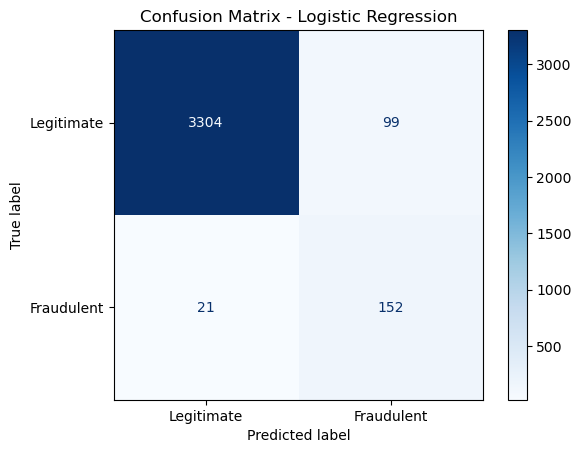

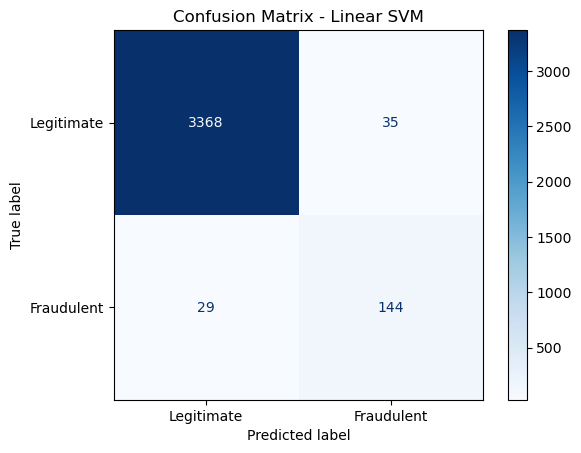

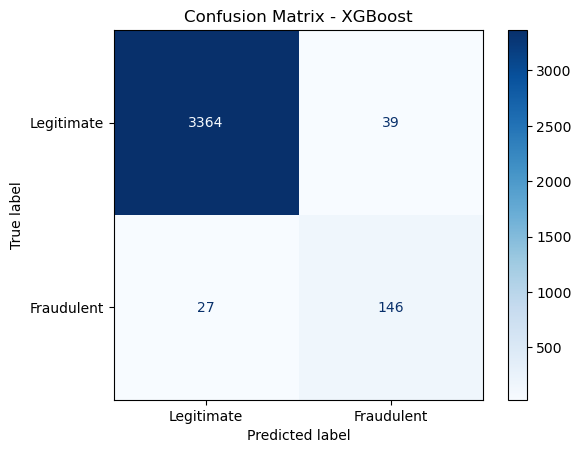

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dictionary of trained models
models = {
    "Logistic Regression": lr,
    "Linear SVM": svm,
    "XGBoost": xgb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legitimate', 'Fraudulent'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.savefig("all_confusion_matrix")
    plt.show()


Logistic Regression - ROC-AUC Score: 0.9819


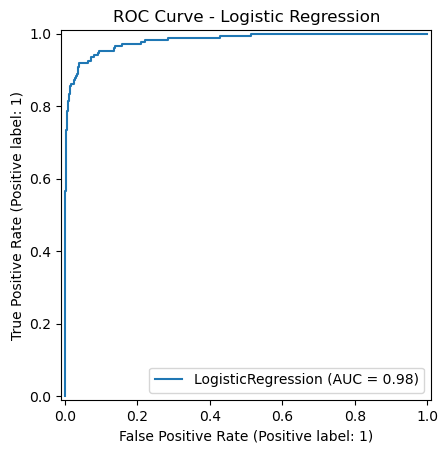

Linear SVM - ROC-AUC Score: 0.9804


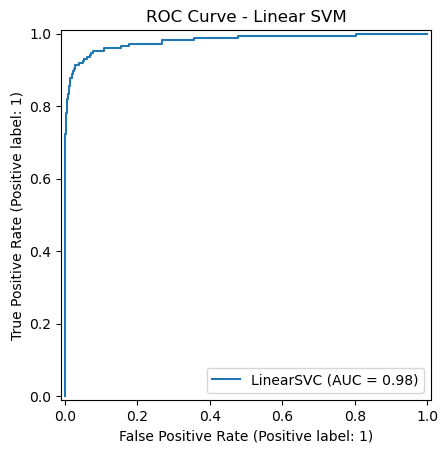

XGBoost - ROC-AUC Score: 0.9886


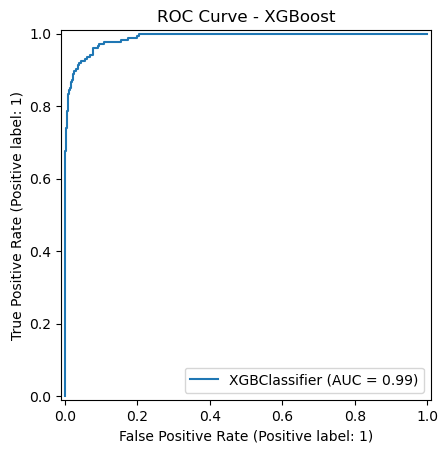

In [43]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Dictionary of trained models
models = {
    "Logistic Regression": lr,
    "Linear SVM": svm,
    "XGBoost": xgb
}

for name, model in models.items():
    # Get probability scores or decision function
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    else:
        y_scores = model.decision_function(X_test)   # SVM/Linear models

    # Compute ROC-AUC
    auc = roc_auc_score(y_test, y_scores)
    print(f"{name} - ROC-AUC Score: {auc:.4f}")
    
    # Plot ROC curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve - {name}")
    plt.show()


| Model               | Precision | Recall     | F1-Score | ROC-AUC    | Notes                                                                               |
| ------------------- | --------- | ---------- | -------- | ---------- | ----------------------------------------------------------------------------------- |
| Logistic Regression | 0.6056    | **0.8786** | 0.7170   | 0.9819     | Highest recall → detects most frauds, but precision is lower → more false positives |
| Linear SVM          | 0.8045    | 0.8324     | 0.8182   | 0.9804     | Balanced precision & recall, slightly lower recall than LR                          |
| XGBoost             | 0.7892    | 0.8439     | 0.8156   | **0.9886** | Highest ROC-AUC → strong overall discrimination, recall slightly lower than LR      |


## Analysis

**Goal: Detect as many fake job postings as possible (recall is most important)**

**Logistic Regression**: Highest recall (0.8786) → catches most frauds, slightly more false positives (lower precision)

**XGBoost**: Highest ROC-AUC (0.9886) → best overall ranking ability, but misses a few more fraudulent jobs than Logistic Regression

**Linear SVM**: Balanced, but recall slightly lower than Logistic Regression

## Recommendation

## Best model for fake job detection: Logistic Regression

**Reasoning:**

Recall prioritized over precision → missing fraud is worse than mislabeling a few legitimate jobs

High ROC-AUC (0.9819) → still excellent overall discrimination